# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [92]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|██████████| 8.61M/8.61M [00:00<00:00, 20.0MB/s]


### Step 1: Visit the Website 

In [94]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

### Step 2: Scrape the Table


In [95]:
# Create a Beautiful Soup Object
soup = soup(browser.html, 'html.parser')


In [100]:
# Extract all rows of data
results = soup.find_all('table', class_= 'table')
results

[]

### Step 3: Store the Data


In [101]:
# Create an empty list
collection = []

# Loop through the scraped data to create a list of rows
for i in results:
    j = i.find_all('tr')
    row = [item.text for item in j]
    collection.append(row)

collection


[]

In [102]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
tables = pd.read_html(url)
df = tables[0]


In [99]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

In [103]:
# Examine data type of each column
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [104]:
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [105]:
df['id'] = df['id'].astype(object)
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

In [106]:
# 1. How many months are there on Mars?
months= df.groupby(['month']).nunique()['terrestrial_date'].count
months

<bound method Series.count of month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: terrestrial_date, dtype: int64>

In [107]:
# 2. How many Martian days' worth of data are there?
df['terrestrial_date'].count()

1867

In [108]:
# 3. What is the average low temperature by month?
min_temp_month= df.groupby(['month']).mean()['min_temp']
min_temp_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Temperature in Celsius')

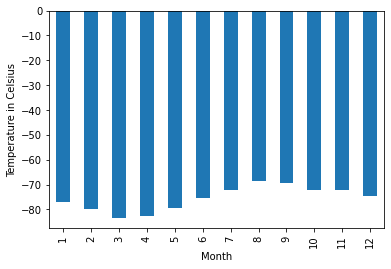

In [109]:
# Plot the average temperature by month
min_temp_month.plot.bar()
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')


Text(0, 0.5, 'Temperature in Celsius')

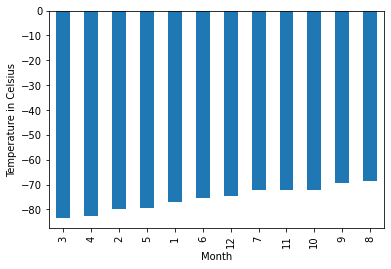

In [110]:
# Identify the coldest and hottest months in Curiosity's location
ascend_temp= min_temp_month.sort_values()
ascend_temp.plot.bar()
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

In [111]:
avg_pressure= df.groupby(['month']).mean()['pressure']
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Atmospheric Pressure')

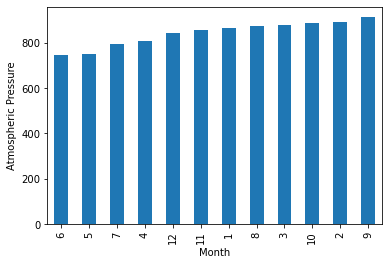

In [83]:
# Plot the average pressure by month
ascend_avg_press= avg_pressure.sort_values()
ascend_avg_press.plot.bar()
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

In [89]:
# 5. How many terrestrial (earth) days are there in a Martian year?
##martian_year= df.groupby(['terrestrial_date']).mean()['min_temp'] ??
martian_year= "687"
martian_year

'687'

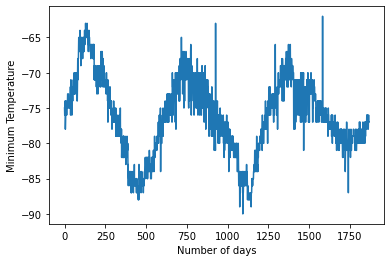

In [87]:
df['min_temp'].plot.line()
plt.xlabel('Number of days')
plt.ylabel('Minimum Temperature')
plt.show()

### Step 6: Save the Data

In [90]:
# Write the data to a CSV
df.to_csv("mars_weather.csv")

In [91]:
browser.quit()